In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('WVS_Cross-National_Inverted_Wave_7_csv_v5_0.csv')

C:\Users\thome\AppData\Local\Temp/ipykernel_34712/2512183436.py:1: DtypeWarning: Columns (0,1,532,533,534) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('WVS_Cross-National_Inverted_Wave_7_csv_v5_0.csv')


In [3]:
data.head()

version                       doi  A_WAVE  A_YEAR  A_STUDY  \
0  1-5-0 (2020-11-16)  doi.org/10.14281/18241.1       7    2018        2   
1  1-5-0 (2020-11-16)  doi.org/10.14281/18241.1       7    2018        2   
2  1-5-0 (2020-11-16)  doi.org/10.14281/18241.1       7    2018        2   
3  1-5-0 (2020-11-16)  doi.org/10.14281/18241.1       7    2018        2   
4  1-5-0 (2020-11-16)  doi.org/10.14281/18241.1       7    2018        2   

   B_COUNTRY B_COUNTRY_ALPHA  C_COW_NUM C_COW_ALPHA  D_INTERVIEW  ...  \
0         20             AND        232         AND     20070001  ...   
1         20             AND        232         AND     20070002  ...   
2         20             AND        232         AND     20070003  ...   
3         20             AND        232         AND     20070004  ...   
4         20             AND        232         AND     20070005  ...   

   WVS_Polmistrust_PartyVoter  WVS_LR_MedianVoter  WVS_LibCon_MedianVoter  \
0                   62.434211              -999.0                  -999.0   
1                   62.434211              -999.0                  -999.0   
2                   62.434211              -999.0                  -999.0   
3                         NaN                 NaN                     NaN   
4                   66.964286              -999.0                  -999.0   

   v2psbars  v2psorgs  v2psprbrch  v2psprlnks  v2psplats  v2xnp_client  \
0    -999.0    -999.0      -999.0      -999.0     -999.0        -999.0   
1    -999.0    -999.0      -999.0      -999.0     -999.0        -999.0   
2    -999.0    -999.0      -999.0      -999.0     -999.0        -999.0   
3       NaN       NaN         NaN         NaN        NaN           NaN   
4    -999.0    -999.0      -999.0      -999.0     -999.0        -999.0   

   v2xps_party  
0       -999.0  
1       -999.0  
2       -999.0  
3          NaN  
4       -999.0  

[5 rows x 564 columns]

In [4]:
data["Q1P"]

0        4
1        4
2        4
3        4
4        4
        ..
94273    4
94274    4
94275    4
94276    4
94277    4
Name: Q1P, Length: 94278, dtype: int64

In [5]:
data.iloc[10]

version               1-5-0 (2020-11-16)
doi             doi.org/10.14281/18241.1
A_WAVE                                 7
A_YEAR                              2018
A_STUDY                                2
                          ...           
v2psprbrch                           NaN
v2psprlnks                           NaN
v2psplats                            NaN
v2xnp_client                         NaN
v2xps_party                          NaN
Name: 10, Length: 564, dtype: object

In [6]:
data.loc[1:10, "Q1P"]

1     4
2     4
3     4
4     4
5     4
6     4
7     4
8     3
9     4
10    4
Name: Q1P, dtype: int64

In [7]:
selected_vars = ['Q1P', 'Q2P']
data[selected_vars]

Q1P  Q2P
0        4    4
1        4    4
2        4    3
3        4    4
4        4    4
...    ...  ...
94273    4    4
94274    4    4
94275    4    4
94276    4    4
94277    4    4

[94278 rows x 2 columns]

In [8]:
ARG_data = data[data['B_COUNTRY'] == 32]
ARG_data.head()

version                       doi  A_WAVE  A_YEAR  A_STUDY  \
1004  1-5-0 (2020-11-16)  doi.org/10.14281/18241.1       7    2017        2   
1005  1-5-0 (2020-11-16)  doi.org/10.14281/18241.1       7    2017        2   
1006  1-5-0 (2020-11-16)  doi.org/10.14281/18241.1       7    2017        2   
1007  1-5-0 (2020-11-16)  doi.org/10.14281/18241.1       7    2017        2   
1008  1-5-0 (2020-11-16)  doi.org/10.14281/18241.1       7    2017        2   

      B_COUNTRY B_COUNTRY_ALPHA  C_COW_NUM C_COW_ALPHA  D_INTERVIEW  ...  \
1004         32             ARG        160         ARG     32070001  ...   
1005         32             ARG        160         ARG     32070002  ...   
1006         32             ARG        160         ARG     32070003  ...   
1007         32             ARG        160         ARG     32070004  ...   
1008         32             ARG        160         ARG     32070005  ...   

      WVS_Polmistrust_PartyVoter  WVS_LR_MedianVoter  WVS_LibCon_MedianVoter  \
1004                         NaN                 NaN                     NaN   
1005                   78.042302             -999.00               -999.0000   
1006                   78.042302             -999.00               -999.0000   
1007                   74.439437                5.65                  6.5125   
1008                         NaN                 NaN                     NaN   

      v2psbars  v2psorgs  v2psprbrch  v2psprlnks  v2psplats  v2xnp_client  \
1004       NaN       NaN         NaN         NaN        NaN           NaN   
1005  -999.000  -999.000    -999.000    -999.000   -999.000      -999.000   
1006  -999.000  -999.000    -999.000    -999.000   -999.000      -999.000   
1007     2.407     1.581       1.502       0.428      0.938         0.459   
1008       NaN       NaN         NaN         NaN        NaN           NaN   

      v2xps_party  
1004          NaN  
1005     -999.000  
1006     -999.000  
1007        0.729  
1008          NaN  

[5 rows x 564 columns]

In [9]:
print(data['Q2P'].mean())
print(data['Q2P'].var())
print(data['Q2P'].std())

3.274008782536753
0.6655762393883811
0.815828560047012


In [10]:
columns = data.columns
print(columns)

Index(['version', 'doi', 'A_WAVE', 'A_YEAR', 'A_STUDY', 'B_COUNTRY',
       'B_COUNTRY_ALPHA', 'C_COW_NUM', 'C_COW_ALPHA', 'D_INTERVIEW',
       ...
       'WVS_Polmistrust_PartyVoter', 'WVS_LR_MedianVoter',
       'WVS_LibCon_MedianVoter', 'v2psbars', 'v2psorgs', 'v2psprbrch',
       'v2psprlnks', 'v2psplats', 'v2xnp_client', 'v2xps_party'],
      dtype='object', length=564)


In [11]:
sel_vars = ['B_COUNTRY'] + columns[38:299].tolist()
data1 = data[sel_vars].copy()

In [12]:
data1.replace([-1,-2,-3,-4,-5], np.nan, inplace = True)

In [13]:
print(data1['Q2P'].mean())
print(data1['Q2P'].var())
print(data1['Q2P'].std())

3.2928376092022518
0.5487902123391195
0.7408037610184761


In [14]:
covariance = data1.iloc[:,1:].cov()
correlation = data1.iloc[:,1:].corr()

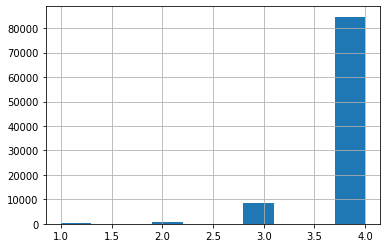

In [15]:
data1['Q1P'].hist()
plt.show()

In [16]:
country_data = data1.groupby('B_COUNTRY').mean()

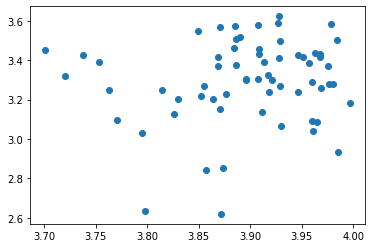

In [17]:
x = country_data['Q1P']
y = country_data['Q2P']
plt.scatter(x, y)
plt.show()

# PCA

In [18]:
X1 = country_data.loc[country_data.isna().sum(axis = 1) == 0] #select complete rows
X2 = country_data.T[country_data.isna().sum(axis = 0) == 0].T #select complete columns

In [19]:
# Label the rows. 
labels = pd.read_csv('country_labels.csv')
labels.columns = ['name', 'id']
country_data.index = labels.name
country_data.head()

Q1P       Q2P       Q3P       Q4P       Q5P       Q6P  \
name                                                                     
Andorra     3.884462  3.464143  3.578685  2.059880  3.474052  2.034930   
Argentina   3.908275  3.458624  3.190190  2.192807  3.531595  2.606061   
Australia   3.889628  3.520385  3.353645  2.588168  3.004608  2.102273   
Bangladesh  3.985000  2.931438  2.808242  1.923671  3.777406  3.932331   
Armenia     3.946852  3.238953  3.096854  2.287829  3.655738  3.600492   

                 Q7P       Q8P       Q9P      Q10P  ...      Q249      Q250  \
name                                                ...                       
Andorra     0.848606  0.468127  0.440239  0.736056  ...  9.004008  9.112662   
Argentina   0.783649  0.342971  0.566301  0.705882  ...  8.700916  8.879676   
Australia   0.822945  0.520132  0.437948  0.569222  ...  8.906090  9.055524   
Bangladesh  0.983333  0.328333  0.515833  0.675000  ...  8.892500  8.112500   
Armenia     0.679803  0.191297  0.720854  0.765189  ...  8.638655  8.928870   

                Q251      Q252     Q253P     Q254P     Q255P     Q256P  \
name                                                                     
Andorra     6.611222  5.779000  3.219219  4.263210  3.401795  3.375250   
Argentina   7.005066  5.412361  2.495298  3.485887  3.404234  3.285714   
Australia   7.410431  5.740471  3.087827  3.579094  3.170691  3.079392   
Bangladesh  7.234167  6.762500  3.086842  3.813178  3.798999  3.497500   
Armenia     5.096469  4.030988  2.156355  3.795211  3.612983  3.362355   

               Q257P     Q258P  
name                            
Andorra     3.309761  2.887450  
Argentina   3.152130  2.709110  
Australia   3.371557  2.349008  
Bangladesh  3.282481  2.298467  
Armenia     3.525144  2.178261  

[5 rows x 261 columns]

In [20]:
# Mean-center and standardize a matrix. 
X2_ctd_std = StandardScaler(with_mean=True, with_std=True).fit_transform(X2)

In [21]:
# Print the column means and varianes. 
print(X2_ctd_std.mean(axis = 0))
print(X2_ctd_std.var(axis = 0))

[ 8.22952817e-15  4.02455846e-16  6.03683770e-16 -4.02455846e-16
 -3.74700271e-16 -1.45716772e-16 -8.32667268e-17  4.85722573e-17
  5.96744876e-16 -4.99600361e-16  1.59594560e-16 -6.67868538e-16
 -1.45716772e-16 -6.93889390e-17 -2.77555756e-17  4.92661467e-16
 -2.77555756e-17 -3.15719673e-16 -9.02056208e-17  4.16333634e-17
  1.31838984e-16  1.66533454e-16  1.38777878e-17  4.16333634e-17
  7.00828284e-16  1.66533454e-16  7.77156117e-16 -1.38777878e-16
  8.74300632e-16 -2.63677968e-16  0.00000000e+00 -1.38777878e-17
  9.71445147e-17  3.67761377e-16 -6.86950496e-16 -1.94289029e-16
  5.75928194e-16 -1.13797860e-15  1.17961196e-16  1.38777878e-17
 -1.35308431e-15 -7.00828284e-16 -3.71230824e-16 -1.52655666e-16
  1.94289029e-16 -3.53883589e-16  6.86950496e-16  2.70616862e-16
 -4.23272528e-16  1.66533454e-16  2.28983499e-16 -3.74700271e-16
 -1.44328993e-15 -7.35522754e-16 -9.15933995e-16  1.38777878e-16
 -1.08246745e-15 -6.93889390e-18 -2.08166817e-17  1.11022302e-16
 -6.90419943e-16 -1.52655

In [22]:
#Perform pca on the scaled matrix. 
model = PCA(svd_solver = 'full')
scores = model.fit_transform(X2_ctd_std)

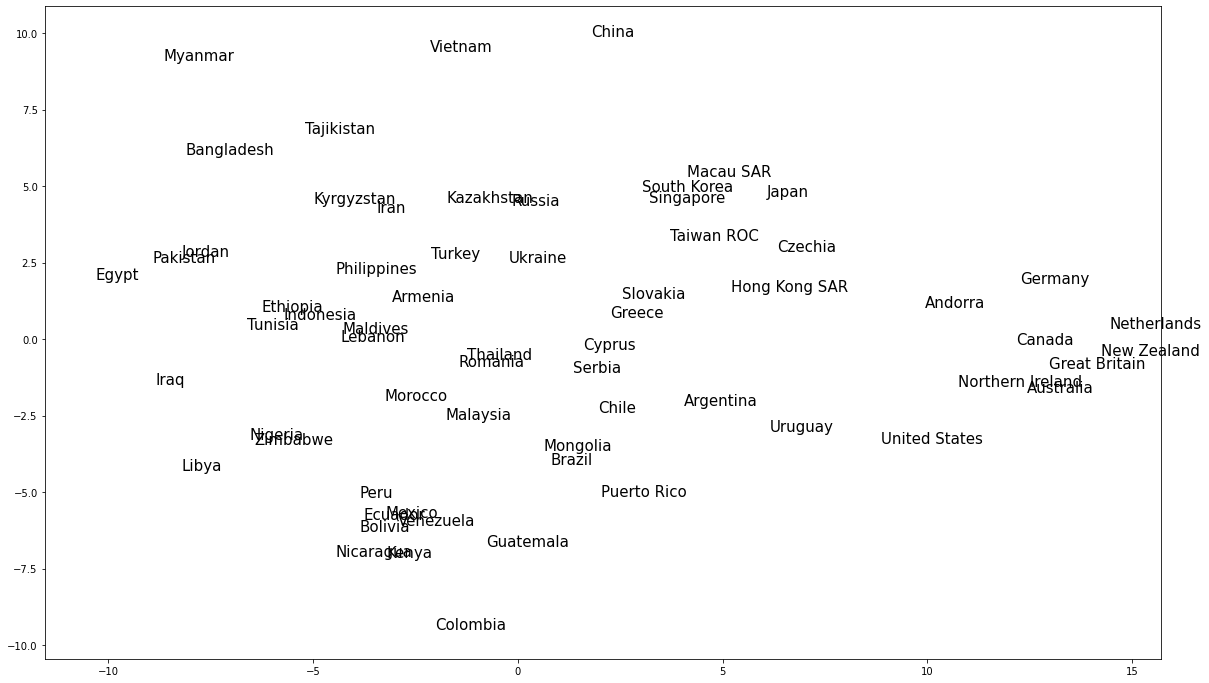

In [23]:
# Produce a rsample plot.
fig = plt.figure(figsize = [20,12])
y1 = scores[:,0]
y2 = scores[:,1]
plt.scatter(y1,y2, alpha = 0)
for i, country in enumerate(labels.name):
    plt.text(y1[i], y2[i], country, size = 15)
plt.show()

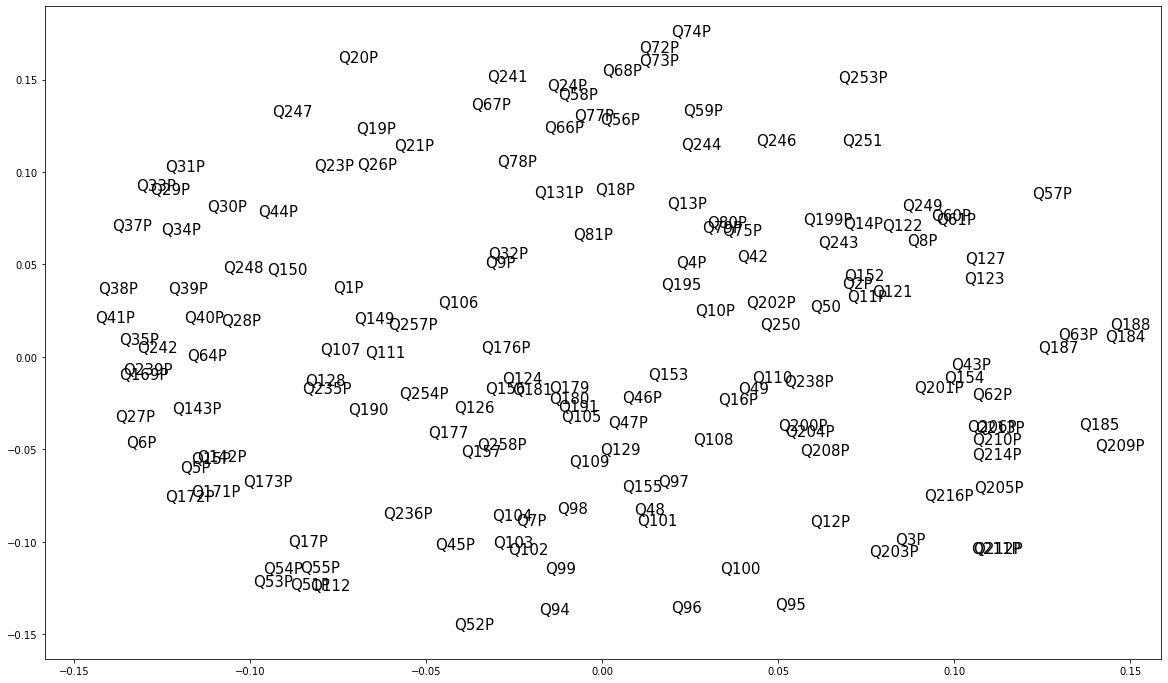

In [24]:
# Produce a variable plot.
fig = plt.figure(figsize = [20,12])
loadings = model.components_
y1_var = loadings[0,:]
y2_var = loadings[1,:]
plt.scatter(y1_var,y2_var, alpha = 0)
for i, var in enumerate(X2.columns):
    plt.text(y1_var[i], y2_var[i], var, size = 15)
plt.show()

In [26]:
# Produce a biplot. You need to properly scale the two plots so that they align with each other. There are different versions for scaling biplots. Here is one way. 
scales = np.ptp(scores, axis = 0) / np.ptp(loadings, axis = 1)

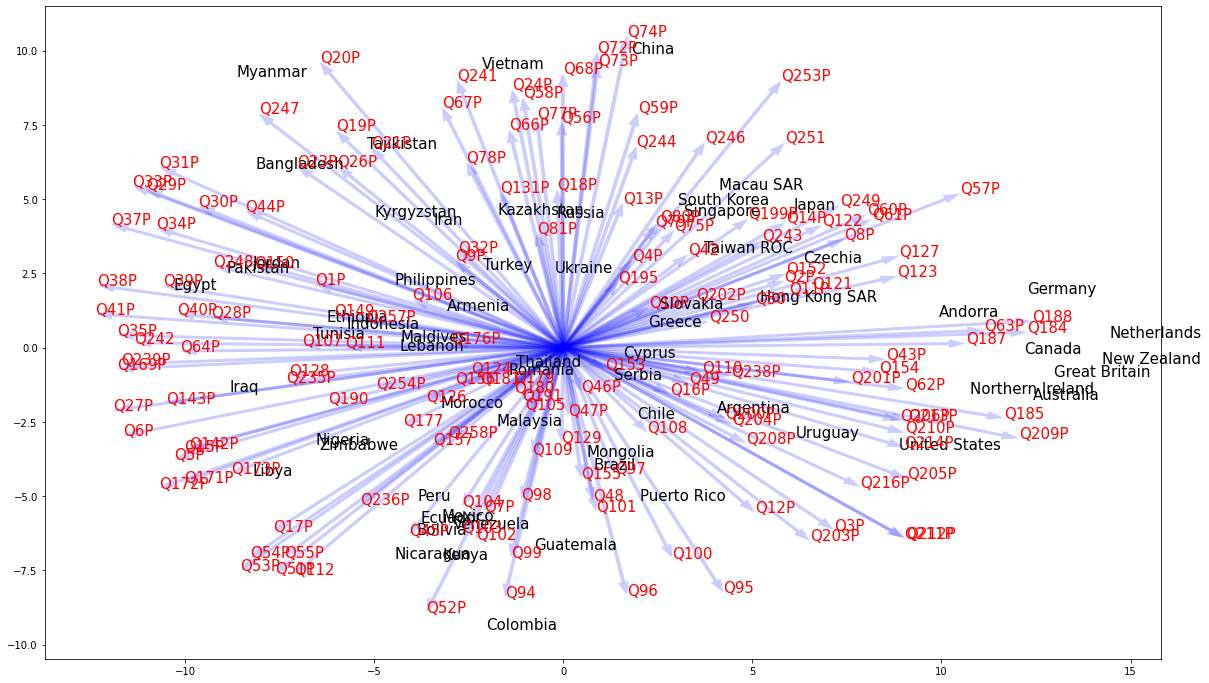

In [26]:
fig = plt.figure(figsize = [20,12])
plt.scatter(y1,y2, alpha = 0)
for i, country in enumerate(labels.name):
    plt.text(y1[i], y2[i], country, size = 15)
for i, var in enumerate(X2.columns):
    plt.arrow(0, 0, scales[0]*y1_var[i], scales[1]*y2_var[i], color='blue', alpha=0.2, width=0.1, ec='none',
              length_includes_head=True)
    plt.text(scales[0]*y1_var[i], scales[1]*y2_var[i], var, size = 15, color = 'red')
plt.show()

Getting the eigenvalues is a bit tricky. Sklearn's pca model only gives you the singular values. You have to calculate the eigenvalues through a conversion. Recall that eigenvalues = singular values$^2$/n.

In [30]:
s = model.singular_values_
eigenvalues = s ** 2 / (X2_ctd_std.shape[0])
eigenvalues #PCA's solutions are unique. You should be able to get the same eigenvalues as you would obtain from R. 

array([4.00128206e+01, 1.79199968e+01, 1.54552268e+01, 1.04875325e+01,
       7.43637803e+00, 5.02978545e+00, 4.76494864e+00, 4.26478879e+00,
       3.88238772e+00, 3.65840392e+00, 3.28570343e+00, 2.92210819e+00,
       2.72117490e+00, 2.64595711e+00, 2.37212037e+00, 2.25964390e+00,
       2.06151501e+00, 1.97129934e+00, 1.84970333e+00, 1.66965804e+00,
       1.61728023e+00, 1.40920440e+00, 1.37225708e+00, 1.28641574e+00,
       1.25190742e+00, 1.19207782e+00, 1.10732441e+00, 1.01623401e+00,
       9.76471339e-01, 9.51169249e-01, 8.59722086e-01, 8.49523671e-01,
       7.92108434e-01, 7.45816010e-01, 6.58419116e-01, 6.50408533e-01,
       5.85829405e-01, 5.60103163e-01, 5.13949700e-01, 4.92213307e-01,
       4.79616865e-01, 4.34148790e-01, 4.04988120e-01, 3.97136211e-01,
       3.83730966e-01, 3.67593357e-01, 3.35505105e-01, 3.14188355e-01,
       2.82369113e-01, 2.67378384e-01, 2.41587493e-01, 2.23466313e-01,
       1.93805227e-01, 1.72473458e-01, 1.58781870e-01, 1.49562059e-01,
      

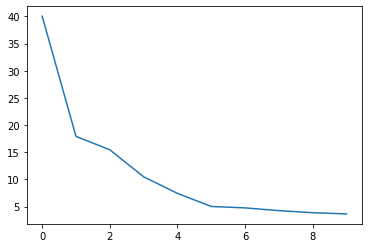

In [29]:
# Plot the eigenvalues of the first ten dimensions.
plt.plot(eigenvalues[:10])